# Video Game Sales Analysis

# Contents <a id='back'></a>

* [Introduction](#introduction)
* [Data Overview](#data_overview)
    * [Initialization](#initialization)
    * [Load Data](load_data)
* [Prepare the Data](#prepare_data)
    * [Viewing the Data](#view_data)
    * [Fix Data](#fix_data)
    * [Enrich Data](#enrich_data)
* [Analyze the Data](#analyze_data)
* [Region User Profile](#user_profile)    
* [Test statistical hypothesis](#hypothesis)
    * [Hypothesis 1](#hypothesis_one)
    * [Hypothesis 2](#Hypothesis_two)
* [Conclusion](#conclusion)

# Introduction <a id='introduction'></a>

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not in order to spot potential big winners and plan advertising campaigns.
Using the provided dataset `/datasets/games.csv` from 2016, imagine that it’s December 2016 and you’re planning a campaign for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.
    
[Back to Contents](#back)

# Data Overview <a id='data_overview'></a>

## Initialization <a id='initialization'></a> <a class="tocSkip">

In [1]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np
from scipy import stats as st
import datetime
import seaborn as sns

## Load data <a id='load_data'></a> <a class="tocSkip">

In [2]:
# Load the data file into DataFrames
games_df = pd.read_csv('/datasets/games.csv')

# Prepare the data <a id='prepare_data'></a>

## Viewing the data <a id='view_data'></a> <a class="tocSkip">

In [3]:
# Print the general/summary information about the plans' DataFrame
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Print a sample of data for plans
display(games_df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Fix data <a id='fix_data'></a> <a class="tocSkip">

In [5]:
# Replace the column names making them lowercase
games_df.columns = games_df.columns.str.lower()

# Display dataframe
display(games_df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Check for missing values
print(games_df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [7]:
# Calculating missing row percentages
print('% missing rows:')
games_df.isna().mean()*100

% missing rows:


name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64

In [8]:
# Display rows with missing values in the "name" column
missing_name_rows = games_df[games_df['name'].isna()]
display(missing_name_rows)

# Handle missing values in 'name' column
games_df.dropna(subset=['name'], inplace=True) # Drop rows with missing value in 'name' column

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Because there are only two rows with missing values in the 'name' column, accounting for only 0.01% of the data, with no practical way to impute the possible name of the games, along with having other missing data within those rows, they are dropped since it will not have significant impact on the data. It is also noted that the 'genre' column has two missing values which are the same rows that had the missing name. Thus, dropping those two rows handles the missing data for both the 'name' and 'genre' column.

In [9]:
# Checking missing value holder in the 'year_of_release' column
display(games_df['year_of_release'].unique())

# Handle missing values in 'year_of_release' column
games_df['year_of_release'].fillna(-1, inplace=True) # Replace NaN with -1 as placeholder value

# Converting column to integer data type
games_df['year_of_release'] = games_df['year_of_release'].astype(int)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

The year_of_release column was changed to integer from float because the year of release for a video game should be viewed as an integer, not a decimal. To maintain an integer type with the missing values, -1 is used as a placeholder rather than keeping it as NaN. This is acceptable since the missing values for this column only account for 1.6% of the data.

In [10]:
# Checking missing value holder in the 'critic_score' column
print(games_df['critic_score'].unique())

# Handle missing values in 'critic_score' column
games_df['critic_score'].fillna(-1, inplace=True) # Replace NaN with -1 as placeholder value

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


To maintain a float type with the missing values, -1 is used as a placeholder rather than keeping it as NaN. This is preferable to imputing data for the missing values since a critic score is not dependent on any of the other columns. Furthermore, because the missing critic_score data accounts for 51% of the data, it is too many entries to fill in with synthetic data while maintaing its integrity.

In [11]:
# Checking missing value holder in the 'user_score' column
print(games_df['user_score'].unique())

# Handle missing values in 'user_score' column
games_df['user_score'].replace('tbd', np.nan, inplace=True) # Replace tbd with nan
games_df['user_score'].fillna(-1, inplace=True) # Replace NaN with -1 as placeholder value

# Converting column to float data type
games_df['user_score'] = games_df['user_score'].astype(float)

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


The user_score column contains both 'nan' and 'tbd' as a missing value. The TBD (to be determined) missing values indicate that the user score was not available at the time of data collection. Eventually, these values would be filled in and updated. To maintain a float type with the missing values after changing the data type, -1 is used as a placeholder for both 'nan' and 'tbd' missing values. This is preferable to imputing data for the missing values since a user score is not dependent on any of the other columns. Furthermore, because the missing user_score data accounts for 40% of the data, it is too many entries to fill in with synthetic data while maintaing its integrity.

In [12]:
# Checking missing value holder in the 'rating' column
print(games_df['rating'].unique())

# Handle missing values in 'user_score' column
games_df['rating'].fillna('unknown', inplace=True) # Replace NaN with 'unknown' as placeholder value

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


The missing 'rating' values accouunt for 40% of the data, which is too significant to fill with synthetic data while maintaining the integrity while also not being a value that can be imputed as it is not directly related to the other columns. Thus the 'nan' missing values is replaced with 'unknown'.

In [13]:
# Confirm no more 'nan' missing values
print(games_df.isna().sum())

# Confirm changed data types
games_df.info()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory us

## Enrich Data <a id='enrich_data'></a> <a class="tocSkip">

In [14]:
# Calculate the total sales for each game and add as separate column in games_df
games_df['total_sales'] = games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Display the updated DataFrame
display(games_df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1.0,-1.0,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1.0,-1.0,unknown,0.01


# Analyze the data <a id='analyze_data'></a>

-1        269
 1980       9
 1981      46
 1982      36
 1983      17
 1984      14
 1985      14
 1986      21
 1987      16
 1988      15
 1989      17
 1990      16
 1991      41
 1992      43
 1993      60
 1994     121
 1995     219
 1996     263
 1997     289
 1998     379
 1999     338
 2000     350
 2001     482
 2002     829
 2003     775
 2004     762
 2005     939
 2006    1006
 2007    1197
 2008    1427
 2009    1426
 2010    1255
 2011    1136
 2012     653
 2013     544
 2014     581
 2015     606
 2016     502
Name: year_of_release, dtype: int64


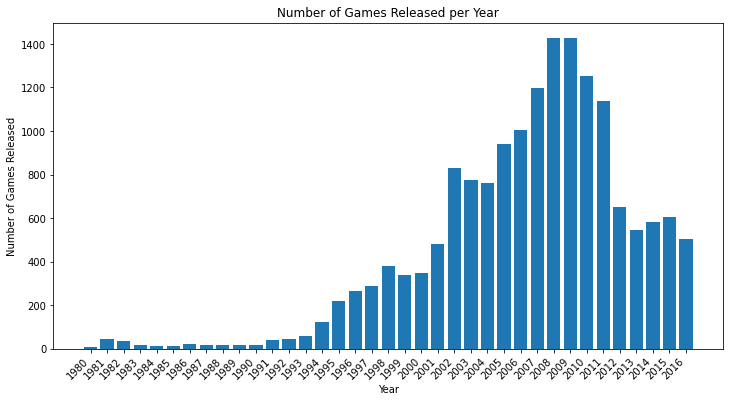

In [15]:
# Count the number of games released in each year
games_per_year = games_df['year_of_release'].value_counts().sort_index()

# Display the result
print(games_per_year)

# Exclude the -1 value from the data
games_per_year = games_per_year[games_per_year.index != -1]

# Create the graph
plt.figure(figsize=(12, 6))
plt.bar(games_per_year.index, games_per_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released per Year')

# Set the x-ticks to display every single year
plt.xticks(games_per_year.index, rotation=45, ha='right')

plt.show()

Overall the number of games released thorughout the 1980s was relatively low, then increasing in the early 1990s up to 2011 before a gradual decline. The data for every single year is not significant, especially for the data from the years before 1994. The most significant years contributing the most data is 2006-2011, but the combination of the years before and after that range together can be significant as well. Note that the -1 was used as a placeholder for missing values.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64



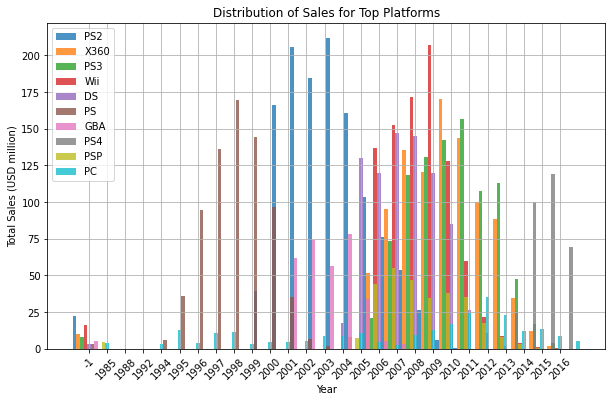

In [16]:
# Analyze how sales vary from platform to platform

# Calculate total sales for each platform and choosing platforms with the greatest total sales
platform_sales = games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(10)
print(top_platforms)
print()

# Build a distribtion based on data for each year
platform_distribution = games_df[games_df['platform'].isin(top_platforms.index)]
platform_yearly_sales = platform_distribution.groupby(['platform', 'year_of_release'])['total_sales'].sum()

# Determine the range of years available across all platforms
year_range = platform_yearly_sales.index.levels[1]

# Plot the distribution of sales for each year among the top platforms
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(year_range))

for i, platform in enumerate(top_platforms.index):
    sales_data = platform_yearly_sales.loc[platform]
    platform_index = [year_range.get_loc(year) for year in sales_data.index]
    plt.bar([x + (i * bar_width) for x in platform_index], sales_data.values, bar_width, label=platform, align='edge', alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Total Sales (USD million)')
plt.title('Distribution of Sales for Top Platforms')
plt.xticks(index + bar_width * (len(top_platforms) - 1) / 2, year_range, rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Looking at the sales from platform to platform, the top ten were chosen to be displayed on the bar graph showing the distribution based on data for each year. Based on the graph, platforms that used to be popular but now have little to zero sales include all the consoles except for the PS4. By 2014, even of the top 10 platforms, none except the the PS4 have more than just 25 million sales. Generally, based on the graph, it appears that it takes about ten years for new platforms to appear then fade, with the exception of PC games which have shown to be relatively consistent throughout with no obvious peak and decline like the other platforms.

Because it takes about ten years for platforms to begin then fade, in order to build a prognosis for 2017, the most recent three years should be taken into consideration and considered relevant. Data from previous years will be disregarded. Even if the platforms did not make the list for total top ten selling platform sales, the most recently released platforms should also be taken into account as well.

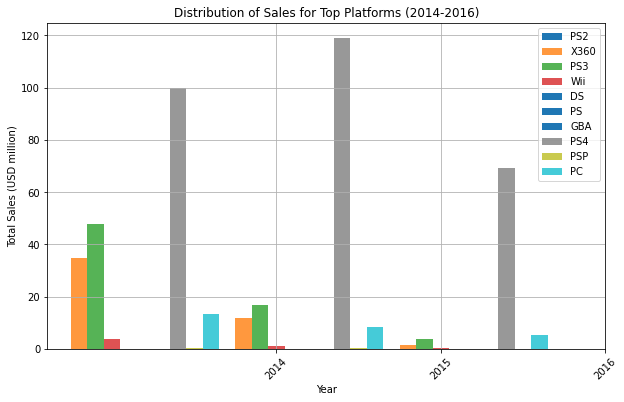

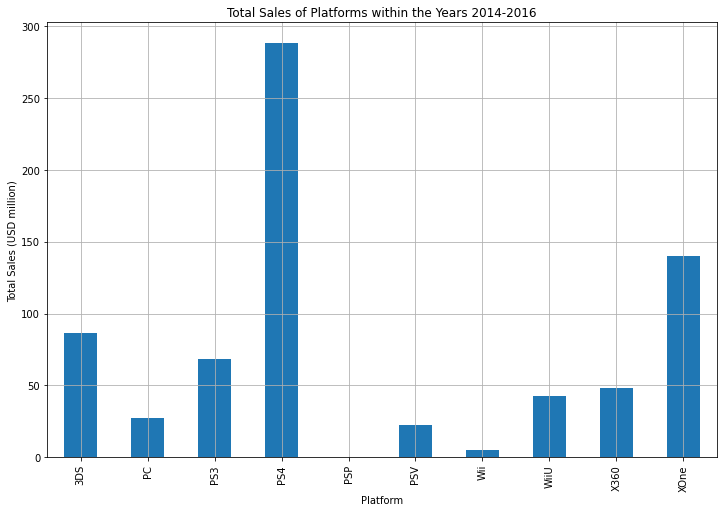

In [17]:
# Select the years 2014, 2015, and 2016
recent_years = [2014, 2015, 2016]

# Plot the distribution of sales for each year among the top platforms
plt.figure(figsize=(10, 6))
bar_width = 0.1
index = np.arange(len(recent_years))
num_platforms = len(top_platforms.index)
bar_spacing = (num_platforms - 1) * bar_width

for i, platform in enumerate(top_platforms.index):
    sales_data = platform_yearly_sales.loc[platform]
    platform_index = [recent_years.index(year) for year in sales_data.index if year in recent_years]
    filtered_sales_data = sales_data[sales_data.index.isin(recent_years)]  # Filter sales data based on recent years
    plt.bar([x + (i * bar_width) - bar_spacing for x in platform_index], filtered_sales_data.values, bar_width, label=platform, align='edge', alpha=0.8)

plt.xlabel('Year')
plt.ylabel('Total Sales (USD million)')
plt.title('Distribution of Sales for Top Platforms (2014-2016)')
plt.xticks(index + bar_width * (len(top_platforms) - 1) / 2, recent_years, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


# Filter the DataFrame for platforms with a year of release in 2014, 2015, and 2016
recent_platforms = games_df[games_df['year_of_release'].isin([2014, 2015, 2016])]

# Calculate the total sales for each platform within the years 2014, 2015, and 2016
platform_sales = recent_platforms.groupby('platform')['total_sales'].sum()

# Plot the sales for each platform
plt.figure(figsize=(12, 8))
platform_sales.plot(kind='bar')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD million)')
plt.title('Total Sales of Platforms within the Years 2014-2016')
plt.grid(True)
plt.show()


By the time of these recent three years, many of the top ten platforms when considering all the data have become outdated. The platforms that still show visible data on the graph showing sales for the past three years will be considered potentially profitable platforms. In addition to this, the current up-to-date platforms should also be considered as well regardless of sales records since they would be the most relevant platforms to consider.

The potentially profitable platforms are: PS4, 3DS, XOne, X360, WiiU, PC.

The DS, PSP, PS3, and Wii are excluded since there are newer versions of those platforms, so their sales are shrinking.

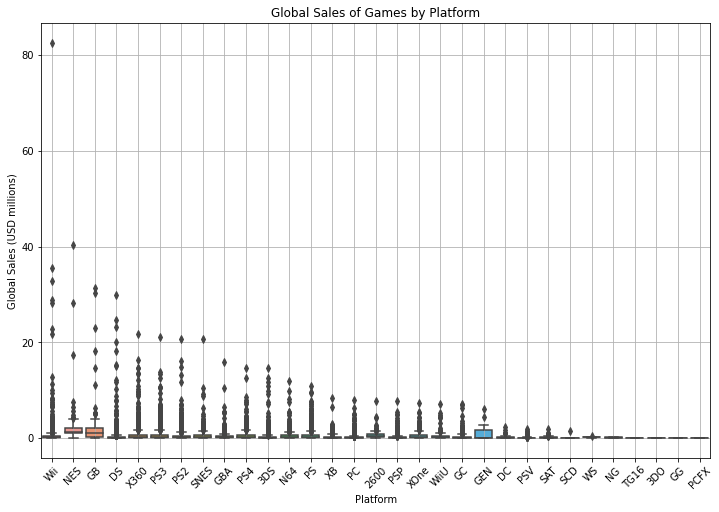

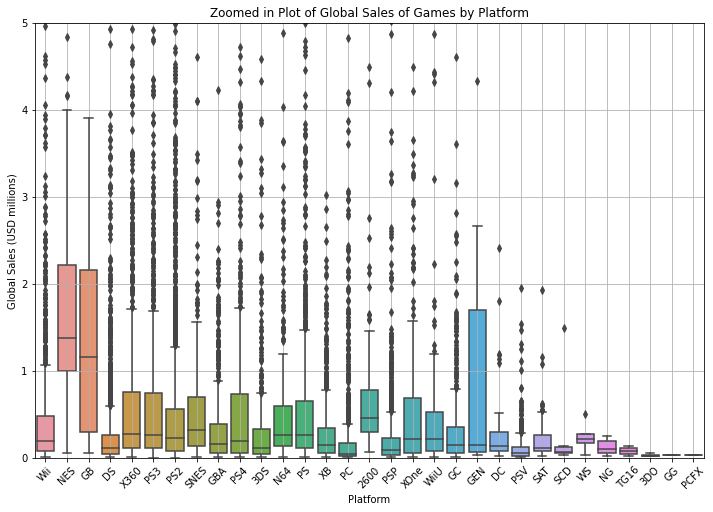

In [18]:
# Filter the DataFrame for non-null global sales
filtered_data = games_df[games_df['total_sales'].notnull()]

# Build the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales (USD millions)')
plt.title('Global Sales of Games by Platform')
plt.xticks(rotation=45)
plt.grid(True)
plt.show


# Set the y-axis limits for zooming in on box plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales (USD millions)')
plt.title('Zoomed in Plot of Global Sales of Games by Platform')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 5)  # Adjust the values as per your preference
plt.show()

The differences in sales for some of the platforms are significant.The medians for NES and GB were much higher than for any of the other platforms. While a box plot does not explicitly display the average value, the central tendency is shown by the median. Since NES and GB have much higher medians, it shows that their sales tend to be higher, while the medians for the other platforms appear relatively similar. The interquartile ranges for NES, GB. and GEN, also have a much wider spread than other platforms, suggesting their sales have greater variability. NES and GB have the longest whiskers and thus more sales variability, and they indicate that they have less outliers than other platforms, but almost all the platforms appear to have many outliers, with the Wii exhibiting the most extreme outlier. 

Correlation between User Score and Total Sales: 0.2798498792503281
Correlation between Critic Score and Total Sales: 0.28468579095782925


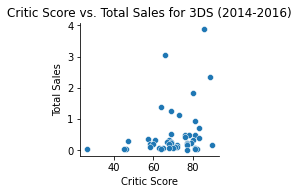

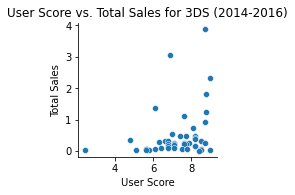

In [19]:
# Filter the data for the Nintendo 3DS platform and the years 2014, 2015, and 2016
ds3_data = games_df[(games_df['platform'] == '3DS') & (games_df['year_of_release'].isin([2014, 2015, 2016]))]

# Filter out the rows with missing value placeholder (-1) in user_score or critic_score
ds3_data = ds3_data[(ds3_data['user_score'] != -1.0) & (ds3_data['critic_score'] != -1.0)]

# Create a pair plot for critic_score/total_sales
sns.pairplot(ds3_data, x_vars=['critic_score'], y_vars=['total_sales'], kind='scatter')
plt.title('Critic Score vs. Total Sales for 3DS (2014-2016)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')

# Create a pair plot for user_score/total_sales
sns.pairplot(ds3_data, x_vars=['user_score'], y_vars=['total_sales'], kind='scatter')
plt.title('User Score vs. Total Sales for 3DS (2014-2016)')
plt.xlabel('User Score')
plt.ylabel('Total Sales')

# Calculate the correlation between reviews and sales
user_sales_corr = ds3_data['user_score'].corr(ds3_data['total_sales'])
critic_sales_corr = ds3_data['critic_score'].corr(ds3_data['total_sales'])

# Print the correlation coefficients
print(f"Correlation between User Score and Total Sales: {user_sales_corr}")
print(f"Correlation between Critic Score and Total Sales: {critic_sales_corr}")

plt.show()


A scatter plot was built to take a look at how user and professional reviews affect sales for the 3DS platform. Based on the calculated correlation between reviews and sales, both user and professional reviews resulted in a weak positive correlation. While the 0.2798 and 0.2847 correlation for user score and critic score, respectively, still suggests a positive relationship, it is not strong, though slightly stronger for critic score. It is important to remember that correlation does not imply causation, and regardless of the score being from users or critics, neither show to have a stronger impact over the other.

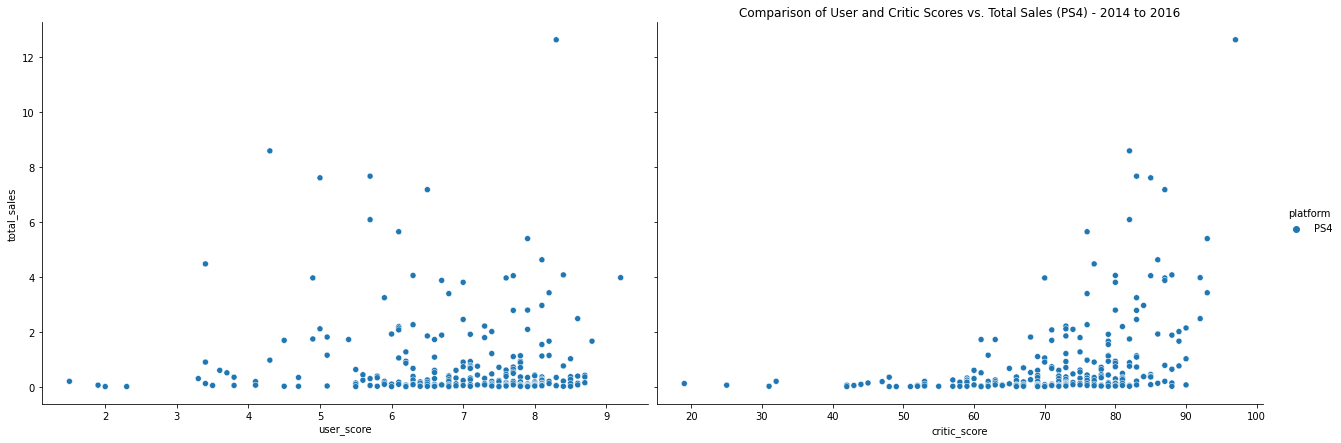

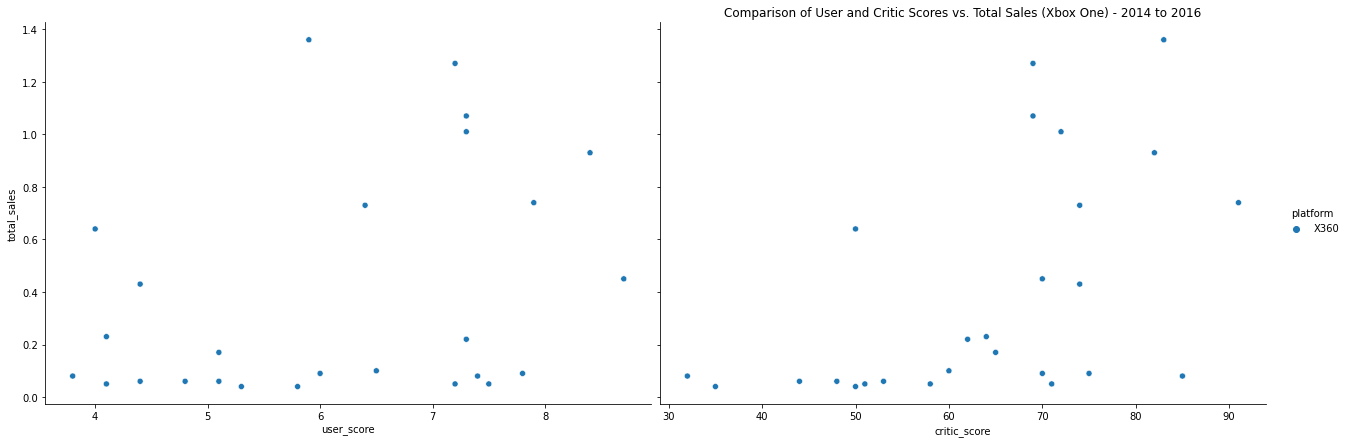

Correlation between PS4 User Score and Total Sales: -0.04318585997193634
Correlation between PS4 Critic Score and Total Sales: 0.40190287811475334
Correlation between Xbox One User Score and Total Sales: 0.33651362483599345
Correlation between Xbox One Critic Score and Total Sales: 0.5257228356581523


In [20]:
import seaborn as sns

# Filter the data for the PS4 platform and the years 2014-2016
ps4_data = games_df[(games_df['platform'] == 'PS4') & (games_df['year_of_release'].between(2014, 2016))]

# Filter out the rows with missing user_score or critic_score
ps4_data = ps4_data[(ps4_data['user_score'] != -1.0) & (ps4_data['critic_score'] != -1.0)]

# Filter the data for the Xbox One platform and the years 2014-2016
x360_data = games_df[(games_df['platform'] == 'X360') & (games_df['year_of_release'].between(2014, 2016))]

# Filter out the rows with missing user_score or critic_score
x360_data = x360_data[(x360_data['user_score'] != -1.0) & (x360_data['critic_score'] != -1.0)]

# Create scatter plots for PS4
sns.pairplot(ps4_data, x_vars=['user_score', 'critic_score'], y_vars=['total_sales'], kind='scatter', hue='platform', height=6, aspect=1.5)
plt.title('Comparison of User and Critic Scores vs. Total Sales (PS4) - 2014 to 2016')

# Create scatter plots for Xbox One
sns.pairplot(x360_data, x_vars=['user_score', 'critic_score'], y_vars=['total_sales'], kind='scatter', hue='platform', height=6, aspect=1.5)
plt.title('Comparison of User and Critic Scores vs. Total Sales (Xbox One) - 2014 to 2016')

plt.show()

# Calculate the correlation between reviews and sales for PS4 and Xbox One
ps4_user_sales_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
ps4_critic_sales_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

x360_user_sales_corr = x360_data['user_score'].corr(x360_data['total_sales'])
x360_critic_sales_corr = x360_data['critic_score'].corr(x360_data['total_sales'])

# Print the correlation coefficients
print(f"Correlation between PS4 User Score and Total Sales: {ps4_user_sales_corr}")
print(f"Correlation between PS4 Critic Score and Total Sales: {ps4_critic_sales_corr}")
print(f"Correlation between Xbox One User Score and Total Sales: {x360_user_sales_corr}")
print(f"Correlation between Xbox One Critic Score and Total Sales: {x360_critic_sales_corr}")

Keeping the conclusions in mind from the previous scatter plot examining the 3DS, the sales of the same games on other platforms were plotted. Results are similar in that there is not a strong correlation. The PS4 user score even has a slight negative correlation. The same conclusion as before seems to hold for these other platforms. It is noted though that critic score does still a show a stronger correlation than user score, albeit small.

/tmp/ipykernel_74/1658321611.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(genre_sales.index, rotation=45)


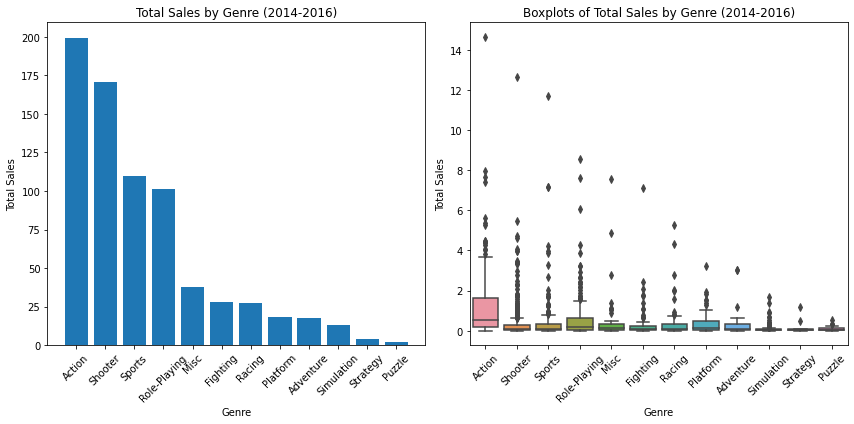

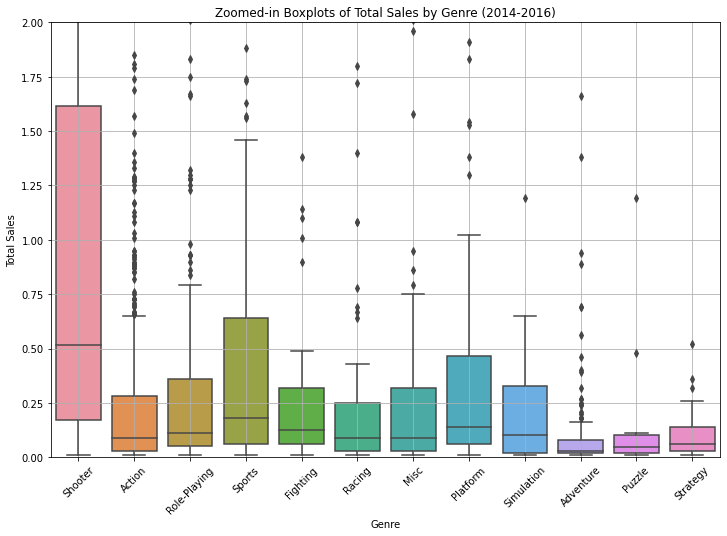

In [21]:
# Filter the data for the years 2014-2016 inclusive
filtered_data = games_df[games_df['year_of_release'].between(2014, 2016)]

# Group the filtered data by genre and calculate the total sales for each genre
genre_sales = filtered_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar graph in the first subplot
ax1.bar(genre_sales.index, genre_sales.values)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Total Sales')
ax1.set_title('Total Sales by Genre (2014-2016)')
ax1.set_xticklabels(genre_sales.index, rotation=45)

# Plot the boxplots in the second subplot
sns.boxplot(x='genre', y='total_sales', data=filtered_data, ax=ax2)
ax2.set_xlabel('Genre')
ax2.set_ylabel('Total Sales')
ax2.set_title('Boxplots of Total Sales by Genre (2014-2016)')
ax2.set_xticklabels(genre_sales.index, rotation=45)

plt.tight_layout()  # Adjust the spacing between subplots

plt.show()

# Create a zoomed-in version of the boxplots
plt.figure(figsize=(12, 8))
sns.boxplot(data=filtered_data, x='genre', y='total_sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.title('Zoomed-in Boxplots of Total Sales by Genre (2014-2016)')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0, 2)  # Adjust the y-axis limits as per your preference
plt.show()

Looking at the distribution of games by genre on the bar graph, it appears that the three most profitable genres are action, shooter, and sports, with strategy and puzzle being the least profitable. Those most profitable genres are closely related with overlapping themes, thus it makes sense if they make up the top three in terms of total sales. It can be generalized that the genres with high sales appeal to a wider general audience regarding interests that most people can relate to, whereas the genres of low sales, such as puzzle, adventure, and strategy, are more "thinking" type games, which may not appeal to as wide of an audience. 

However, upon taking another look through the data from the boxplots, we see that initial observations were slightly different due to the many outliers. Ignoring the outliers shown by the boxplots, we see that shooter games by far have the highest sales, then sports, but actions games are no longer part of the top three. Platform games were the third highest with other genres still higher than action which was the initial top genre. Adventure, puzzle, and strategy games though still appear to be the least profitable genres as observed in the boxplots as well.

# Region User Profile <a id='user_profile'></a>

In [22]:
# Filter the data for the years 2014-2016 inclusive
filtered_data = games_df[games_df['year_of_release'].between(2014, 2016)]

# Filter the data for each region based on the filtered years
na_data = filtered_data[filtered_data['na_sales'] > 0]
eu_data = filtered_data[filtered_data['eu_sales'] > 0]
jp_data = filtered_data[filtered_data['jp_sales'] > 0]

# Determine the top five platforms for each region
top_platforms_na = na_data.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = eu_data.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = jp_data.groupby('platform')['jp_sales'].sum().nlargest(5)

print('Top five platforms for NA (2014-2016):', top_platforms_na)
print()
print('Top five platforms for EU (2014-2016):', top_platforms_eu)
print()
print('Top five platforms for JP (2014-2016):', top_platforms_jp)
print()

Top five platforms for NA (2014-2016): platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Top five platforms for EU (2014-2016): platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Top five platforms for JP (2014-2016): platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64



Above lists the top five platforms for each region and their respective sales.

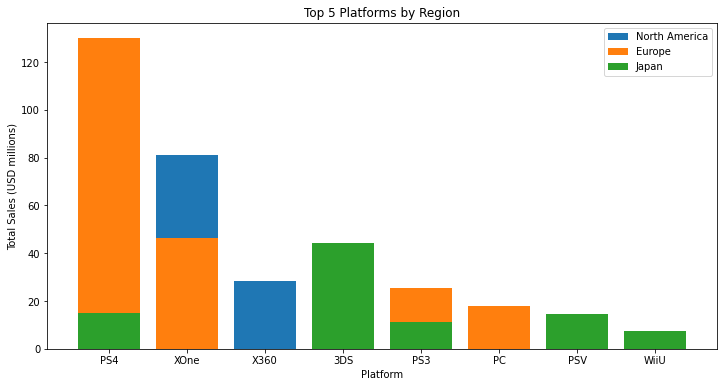

In [23]:
# Plotting market shares for each region
plt.figure(figsize=(12, 6))
plt.bar(top_platforms_na.index, top_platforms_na.values, label='North America')
plt.bar(top_platforms_eu.index, top_platforms_eu.values, label='Europe')
plt.bar(top_platforms_jp.index, top_platforms_jp.values, label='Japan')
plt.xlabel('Platform')
plt.ylabel('Total Sales (USD millions)')
plt.title('Top 5 Platforms by Region')
plt.legend()
plt.show()

The top five platforms with their respective sales for each region were plotted in the above bar graph. While some regions did overlap in their top platforms, there were some differences. North America and Europe share all but one of the top platforms. The top Japanese platforms differed the most, being the only region to include SNES and the 3DS as some of their top platforms. However, regardless of the top platforms, sales for North America was the highest in all of their respective platforms, Europe second, and Japan last.

In [24]:
# Determine top five genres in each region
top_genres_na = na_data.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = eu_data.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = jp_data.groupby('genre')['jp_sales'].sum().nlargest(5)

print('Top five genres for NA:', top_genres_na)
print()
print('Top five genres for EU:', top_genres_eu)
print()
print('Top five genres for JP:', top_genres_jp)
print()

Top five genres for NA: genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

Top five genres for EU: genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Top five genres for JP: genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64



Above lists the top five genres for each region and their respective sales.

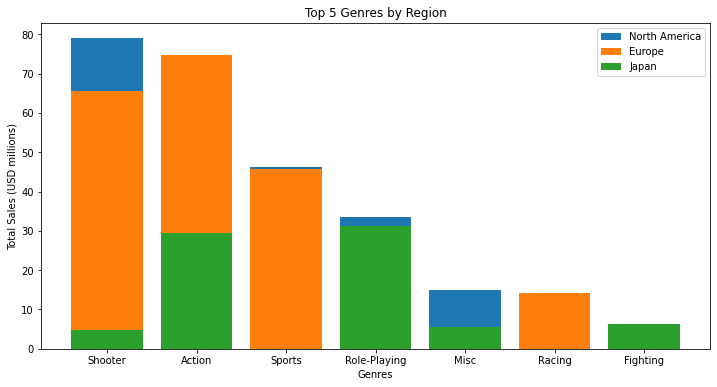

In [25]:
# Plotting market shares for each region by genre
plt.figure(figsize=(12, 6))
plt.bar(top_genres_na.index, top_genres_na.values, label='North America')
plt.bar(top_genres_eu.index, top_genres_eu.values, label='Europe')
plt.bar(top_genres_jp.index, top_genres_jp.values, label='Japan')
plt.xlabel('Genres')
plt.ylabel('Total Sales (USD millions)')
plt.title('Top 5 Genres by Region')
plt.legend()
plt.show()

Overall, the top five genres for each region were very similar. All three regions included action and sports, which were also the highest sales genres for both North America and Europe, and it was second for Japan, whose top and unique genre was role-playing. Racing was a unique top genre for Europe. Shooter games were top genres for North America and Europe, while platform genres were in the top genre list for North America and Japan.

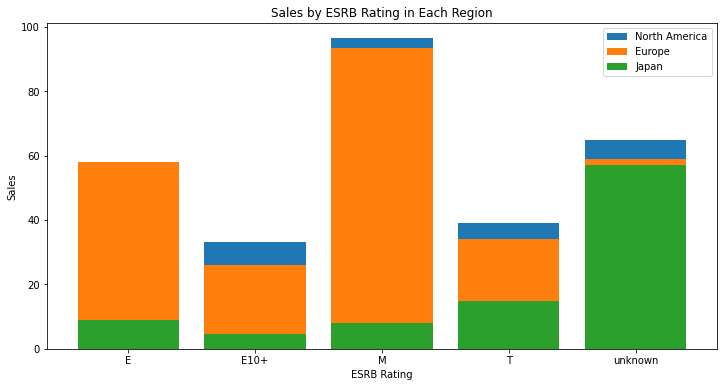

In [26]:
# Calculate the average sales for each ESRB rating in each region
sales_by_rating_na = na_data.groupby('rating')['na_sales'].sum()
sales_by_rating_eu = eu_data.groupby('rating')['eu_sales'].sum()
sales_by_rating_jp = jp_data.groupby('rating')['jp_sales'].sum()

# Plotting total sales by ESRB rating for each region
plt.figure(figsize=(12, 6))
plt.bar(sales_by_rating_na.index, sales_by_rating_na.values, label='North America')
plt.bar(sales_by_rating_eu.index, sales_by_rating_eu.values, label='Europe')
plt.bar(sales_by_rating_jp.index, sales_by_rating_jp.values, label='Japan')
plt.xlabel('ESRB Rating')
plt.ylabel('Sales')
plt.title('Sales by ESRB Rating in Each Region')
plt.legend()
plt.show()


ESRB rating do not appear to have significant affect in sales by individual regions. For all three regions, the E rating had the most sales, followed by M and T for all regions with similar sales (though T is higher in Japan than M), and then E10+ for all regions. These results show that ESRB ratings do have an affect on sales, but mostly is not influenced by a specific region.

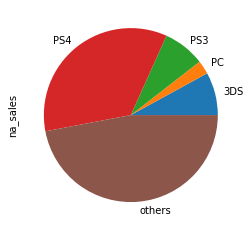

In [27]:
#REVIEWER CODE
import warnings
warnings.filterwarnings("ignore")
platforms_na = games_df.query('year_of_release > 2013')[['platform', 'na_sales']].groupby('platform')['na_sales'].sum().reset_index()
platforms_na.loc[5:, 'platform'] = 'others'
platforms_na.groupby('platform')['na_sales'].sum().plot(kind = 'pie');

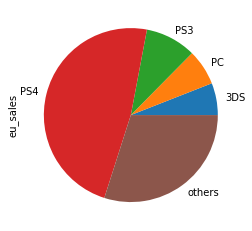

In [28]:
warnings.filterwarnings("ignore")
platforms_eu = games_df.query('year_of_release > 2013')[['platform', 'eu_sales']].groupby('platform')['eu_sales'].sum().reset_index()
platforms_eu.loc[5:, 'platform'] = 'others'
platforms_eu.groupby('platform')['eu_sales'].sum().plot(kind = 'pie');

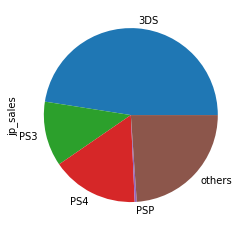

In [29]:
warnings.filterwarnings("ignore")
platforms_jp = games_df.query('year_of_release > 2013')[['platform', 'jp_sales']].groupby('platform')['jp_sales'].sum().reset_index()
platforms_jp.loc[5:, 'platform'] = 'others'
platforms_jp.groupby('platform')['jp_sales'].sum().plot(kind = 'pie');

Based on the pie charts, EU and NA have similar platform preferences, with the PS4 being the most popular, but also sharing the other top popular platforms of PS3, 3DS, and PC in similar sales amounts. JP on the other hand has a very different profile, with the 3DS being vastly more popular accounting for almost half the sales, then PS3, PS4, and others.

# Test Statistical Hypothesis <a id='hypotheses'></a>

## Hypothesis 1 <a id='hypotheses_one'></a> <a class="tocSkip">

Null hypothesis (H0): The average user ratings of the Xbox One and PC platforms are equal.

Alternative hypothesis (HA): The average user ratings of the Xbox One and PC platforms are different.

The given hypothesis to test is the null hypothesis since the null hypothesis is always stated with an equal sign. The alternative hypothesis is based on the null hypothesis. We can test this hypothesis using a two-sample t-test because we're comparing the means of two independent samples.

The significance level that will be used to test the hypothesis is 0.05, corresponding to a 5% chance of rejecting the null hypothesis when it is true. For this research scenario, this significance value provides a balance between the risk of false positives and false negatives. 

In [30]:
# Filter the data for the 'XOne' platform and the years 2014-2016
xbox_one_ratings = games_df[(games_df['platform'] == 'XOne') & (games_df['user_score'] != -1) & (games_df['year_of_release'].between(2014, 2016))]['user_score']

# Filter the data for the 'PC' platform and the years 2014-2016
pc_ratings = games_df[(games_df['platform'] == 'PC') & (games_df['user_score'] != -1) & (games_df['year_of_release'].between(2014, 2016))]['user_score']

alpha = 0.05

results = st.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=True)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value: 0.10450507919348415
We fail to reject the null hypothesis


Based on the calculated p-value of 0.1045, at a significance level of 0.05, we fail to reject the null hypothesis. Therefore, we do not have sufficient evidence to conclude that the average user ratings of the Xbox One and PC platforms are different. This suggests that there is no significant difference in the average user ratings between these two platforms.

## Hypothesis 2 <a id='hypotheses_two'></a> <a class="tocSkip">

Null Hypothesis (H0): The average user ratings for the Action and Sports genres are equal.

Alternative Hypothesis (HA): The average user ratings for the Action and Sports genres are different.

The given hypothesis to test is the null hypothesis since the null hypothesis is always stated with an equal sign. The alternative hypothesis is based on the null hypothesis. We can test this hypothesis using a two-sample t-test because we're comparing the means of two independent samples.

The significance level that will be used to test the hypothesis is 0.05, corresponding to a 5% chance of rejecting the null hypothesis when it is true. For this research scenario, this significance value provides a balance between the risk of false positives and false negatives. 

In [31]:
# Test the hypotheses
    
# Filter the data for the 'action' genre and within the years 2014-2016, removing missing values (-1)
action_ratings = games_df[(games_df['genre'] == 'Action') & (games_df['year_of_release'].between(2014, 2016)) & (games_df['user_score'] != -1)]['user_score']

# Filter the data for the 'sports' genre and within the years 2014-2016, removing missing values (-1)
sports_ratings = games_df[(games_df['genre'] == 'Sports') & (games_df['year_of_release'].between(2014, 2016)) & (games_df['user_score'] != -1)]['user_score']

alpha = 0.05

results = st.ttest_ind(action_ratings, sports_ratings, equal_var=True)

print('p-value:', results.pvalue)

if np.isnan(results.pvalue):
    print("Insufficient data to perform the t-test")
elif results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p-value: 2.8711147985105864e-19
We reject the null hypothesis



Based on the calculated p-value of 2.8711147985105864e-19, which is significantly smaller than the chosen significance level of 0.05, we reject the null hypothesis. Therefore, we can conclude that the average user ratings for the Action and Sports genres are different.

This result suggests that there is a statistically significant difference in user ratings between the Action and Sports genres. It implies that users perceive and rate games from these genres differently, possibly due to variations in gameplay mechanics, themes, or overall gaming experience.

# Conclusion <a id='conclusion'></a>

Valuable insight was obtained from the video game sales data to spot potential big winners and plan advertising campaigns. The top five platforms in terms of video game sales are PS2, X360, PS3, Wii, and the DS. However, we cannot look at only the top five platform sales records because some of those platforms are no longer current for 2017 predictions even if they have historically had the most sales. Relevant platforms sales were thus analyzed, looking only at a few years immediately prior to 2017 since it was also observed that new platforms come and fade away about every ten years.

Based on sales for platforms in recent years before 2017, the PS4, XOne, 3DS, X360, WiiU, and PC, appear to be the most relevant platforms. With the exception to a few old platforms, generally the total global sales of games were around the same for most platforms, and for the most part, critic and user scores also did not have a significant effect on sales. 

Critical observations were found in the difference of sales, genre, region, and ESRB ratings, which can aid in planning advertising campaigns for different types of games for different regions. While the type of ESRB rating does appear to have an affect on sales, it is not significantly impacted by region. For the most part, genres tastes were also similar for the three regions, except with Japan also favoring role playing games. Regarding platform popularity, North America and Europe were also very similar, with only Japan being drastically different. All of this can play a role in how advertisement campaigns should be planned.

After the first hypothesis testing, it was determined that the obtained results do not have sufficient evidence to conclude that the average user ratings of the Xbox One and PC platforms are different. This suggests that there is no significant difference in the average user ratings between these two platforms.

In the second hypothesis testing, the obtained results suggests that there is a statistically significant difference in user ratings between the Action and Sports genres. It implies that users perceive and rate games from these genres differently, possibly due to variations in gameplay mechanics, themes, or overall gaming experience. 

It should be kept in mind that the analysis for the data had a significant amount of missing data as well that could have effected analyses. Due to the importance in accuracy of data for this specific scenario, it was opted to maintain the missing values and fill them with placeholders since they could not be imputed. The current analysis still gains valuable insight, but more effort in obtaining the missing data in collection is crucial for more accuracy.